In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [2]:
teledata = pd.read_csv("/content/Telecom Customers Churn.csv")
teledata.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Check Data info , Shape , The First 5 observations , The Last 5 observations , Missing Values and Description !

In [3]:
    print(20*"-" + "Information".center(20) + 20*"-")
    print(teledata.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(teledata.shape)
    print("\n" + 20*"-" + "The First 5 observations".center(20) + 20*"-")
    display(teledata.head())
    print("\n" + 20 * "-" + "The Last 5 observations".center(20) + 20 * "-")
    display(teledata.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(teledata.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(teledata.describe().T)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-n

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--------------------The Last 5 observations--------------------


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No



--------------------   Missing Values   --------------------
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

----------------------------------------           Describe the Data            ----------------------------------------
                 count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen  

In [4]:
print(teledata.duplicated().sum())

0


In [5]:
teledata.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Detection of unique values for preparation to encode

In [6]:
teledata.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [7]:
columns_to_check = teledata.columns.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'])
for column in columns_to_check:
    print(f"Unique values in {column}: {teledata[column].unique()}")

Unique values in gender: ['Female' 'Male']
Unique values in SeniorCitizen: [0 1]
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Churn: ['N

# Drop Customer id column

In [8]:
teledata = teledata.drop("customerID",axis=1)
teledata.shape
teledata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Encoding Data

In [9]:
teledata['TotalCharges'] = pd.to_numeric(teledata['TotalCharges'], errors='coerce')
teledata['TotalCharges'] = teledata['TotalCharges'].fillna(0)

categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'PaperlessBilling', 'Churn']
teledata_encoded = pd.get_dummies(teledata, columns=categorical_columns, drop_first=True)

label_encode_columns = ['InternetService', 'MultipleLines', 'Contract', 'PaymentMethod']
label_encoder = LabelEncoder()
for col in label_encode_columns:
    teledata_encoded[col] = label_encoder.fit_transform(teledata_encoded[col])

teledata_encoded.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes
0,0,1,1,0,0,2,29.85,29.85,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0,34,0,0,1,3,56.95,1889.50,True,False,...,False,True,False,False,False,False,False,False,False,False
2,0,2,0,0,0,3,53.85,108.15,True,False,...,False,False,False,False,False,False,False,False,True,True
3,0,45,1,0,1,0,42.30,1840.75,True,False,...,False,True,False,True,False,False,False,False,False,False
4,0,2,0,1,0,2,70.70,151.65,False,False,...,False,False,False,False,False,False,False,False,True,True


NOTE !!!!!!!!!

InternetService:
                 
                  DSL = 0
                  Fiber optic = 1
                  No = 2



MultipleLines:
                 
                 No = 0
                 Yes = 1
                 No phone service = 2



Contract:

                  Month-to-month = 0
                  One year = 1
                  Two year = 2


PaymentMethod:

                  Bank transfer (automatic) = 0
                  Credit card (automatic) = 1
                  Electronic check = 2
                  Mailed check = 3
                  
                  

# Churn Visualization to check the balance of data

In [10]:
churn_counts = teledata['Churn'].value_counts()
print(churn_counts)

churn_labels = churn_counts.index
churn_values = churn_counts.values
fig = go.Figure(data=[go.Pie(labels=churn_labels, values=churn_values,
                             textinfo='label+percent',
                             marker=dict(colors=['#1f77b4', '#ff7f0e']),
                             hole=0.3)])


fig.update_layout(
    title_text='Churn Distribution',
    title_x=0.5,
    legend_title_text='Churn',
    legend=dict(x=1, y=0.5),
    margin=dict(t=50, b=0, l=0, r=0)
)

fig.show()

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [11]:
gender_counts = teledata['gender'].value_counts()
print(gender_counts)

gender_labels = gender_counts.index
gender_values = gender_counts.values
fig = go.Figure(data=[go.Pie(labels=gender_labels, values=gender_values,
                             textinfo='label+percent',
                             marker=dict(colors=['#1f77b4', '#ff7f0e']),
                             hole=0.3)])


fig.update_layout(
    title_text='Gender Distribution',
    title_x=0.5,
    legend_title_text='Gender',
    legend=dict(x=1, y=0.5),
    margin=dict(t=50, b=0, l=0, r=0)
)

fig.show()

gender
Male      3555
Female    3488
Name: count, dtype: int64


In [12]:
gender_churn_counts = teledata.groupby(['gender', 'Churn']).size().unstack()
gender_churn_counts = teledata.groupby(['gender', 'Churn']).size().unstack()
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Churn Distribution for Males', 'Churn Distribution for Females'),
                    specs=[[{'type':'pie'}, {'type':'pie'}]])

fig.add_trace(go.Pie(labels=gender_churn_counts.columns,
                     values=gender_churn_counts.loc['Male'],
                     textinfo='label+percent',
                     marker=dict(colors=['#1f77b4', '#ff7f0e']),  # Blue and red
                     name='Male'),
              row=1, col=1)

fig.add_trace(go.Pie(labels=gender_churn_counts.columns,
                     values=gender_churn_counts.loc['Female'],
                     textinfo='label+percent',
                     marker=dict(colors=['#1f77b4', '#ff69b4']),  # Blue and pink
                     name='Female'),
              row=1, col=2)

fig.update_layout(
    title_text='Churn Distribution by Gender',
    title_x=0.5,
    showlegend=True,
    legend_title_text='Churn Status',
    margin=dict(t=50, b=0, l=0, r=0),
    height=600,
    width=1200
)

fig.show()

# We detect that the data is imbalanced

# Oversampling using SMOTE

In [13]:
X = teledata_encoded.drop(columns=['Churn_Yes'])
y = teledata_encoded['Churn_Yes']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

Churn_Yes
False    5174
True     5174
Name: count, dtype: int64


# Outliers Detection

In [14]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'tenure'
Q1_tenure = teledata_encoded['tenure'].quantile(0.25)
Q3_tenure = teledata_encoded['tenure'].quantile(0.75)
IQR_tenure = Q3_tenure - Q1_tenure

# Step 2: Calculate bounds for 'tenure'
lower_bound_tenure = Q1_tenure - 1.5 * IQR_tenure
upper_bound_tenure = Q3_tenure + 1.5 * IQR_tenure

# Step 3: Filter out 'tenure' outliers
data_filtered_tenure = teledata_encoded[(teledata_encoded['tenure'] >= lower_bound_tenure) & (teledata_encoded['tenure'] <= upper_bound_tenure)]

# Step 4: Calculate Q1, Q3, and IQR for 'MonthlyCharges'
Q1_mc = data_filtered_tenure['MonthlyCharges'].quantile(0.25)
Q3_mc = data_filtered_tenure['MonthlyCharges'].quantile(0.75)
IQR_mc = Q3_mc - Q1_mc

# Step 5: Calculate bounds for 'MonthlyCharges'
lower_bound_mc = Q1_mc - 1.5 * IQR_mc
upper_bound_mc = Q3_mc + 1.5 * IQR_mc

# Step 6: Filter out 'MonthlyCharges' outliers
data_filtered_mc = data_filtered_tenure[(data_filtered_tenure['MonthlyCharges'] >= lower_bound_mc) & (data_filtered_tenure['MonthlyCharges'] <= upper_bound_mc)]

# Step 7: Calculate Q1, Q3, and IQR for 'TotalCharges'
Q1_tc = data_filtered_mc['TotalCharges'].quantile(0.25)
Q3_tc = data_filtered_mc['TotalCharges'].quantile(0.75)
IQR_tc = Q3_tc - Q1_tc

# Step 8: Calculate bounds for 'TotalCharges'
lower_bound_tc = Q1_tc - 1.5 * IQR_tc
upper_bound_tc = Q3_tc + 1.5 * IQR_tc

# Step 9: Filter out 'TotalCharges' outliers
data_filtered_final = data_filtered_mc[(data_filtered_mc['TotalCharges'] >= lower_bound_tc) & (data_filtered_mc['TotalCharges'] <= upper_bound_tc)]

# Output: Display the filtered dataset
print(data_filtered_final.shape)
print(teledata_encoded.shape)

# Where are dimensions of data_filtered_final = dimensions of teledata_encoded , So there is no outliers

(7043, 26)
(7043, 26)


Where are dimensions of data_filtered_final = dimensions of teledata_encoded , So there is no outliers

# PCA

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [16]:
pca = PCA(n_components=19)
X_pca = pca.fit_transform(X_scaled)

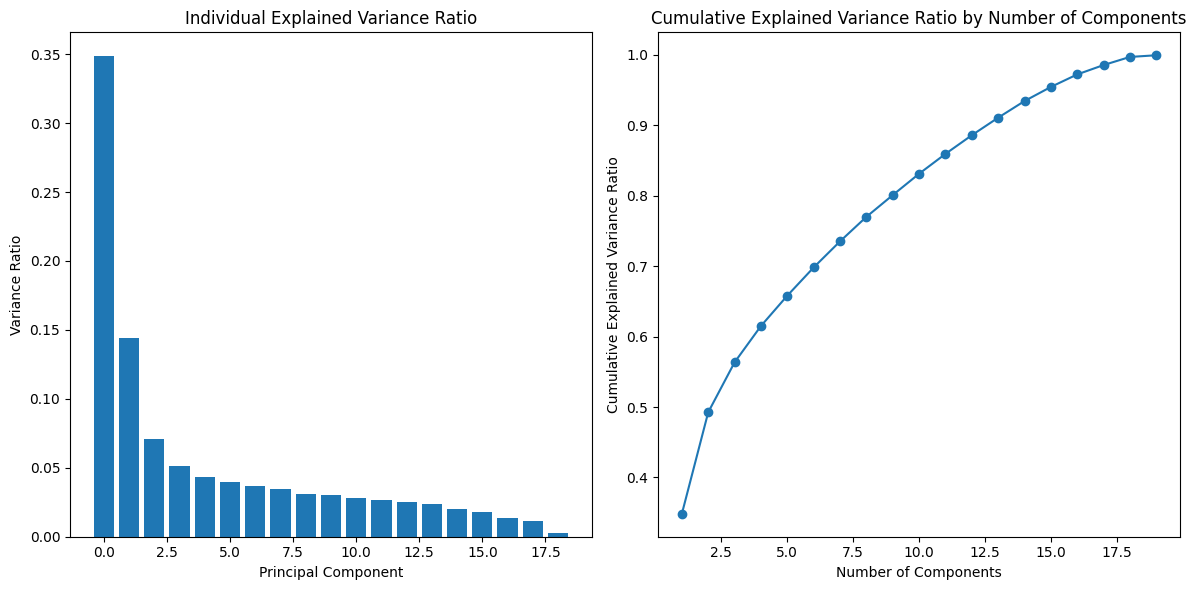

In [17]:
plt.figure(figsize=(12, 6))

# Bar plot for individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Individual Explained Variance Ratio')

# Cumulative explained variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')

plt.tight_layout()
plt.show()

# From Cumulative Explained Variance Ratio , We know that the best n_components is 19 as the line The line was then fixed

# We will use X_scaled as our X and y_resampled as our Y

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Logistic Regression**

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg_train = log_reg.predict(X_train_scaled)
y_pred_log_reg = log_reg.predict(X_test_scaled)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)

In [21]:
acc_log_reg_train = accuracy_score(y_train, y_pred_log_reg_train)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Train Accuracy:", acc_log_reg_train)
print("Logistic Regression Test Accuracy:", acc_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)
print("Logistic Regression Classification Report:\n", report_log_reg)

Logistic Regression Train Accuracy: 0.7844815684108795
Logistic Regression Test Accuracy: 0.8016103059581321
Logistic Regression Classification Report:
 {'False': {'precision': 0.8416547788873039, 'recall': 0.7496823379923762, 'f1-score': 0.7930107526881722, 'support': 1574.0}, 'True': {'precision': 0.7686435701702877, 'recall': 0.8549967341606793, 'f1-score': 0.8095238095238095, 'support': 1531.0}, 'accuracy': 0.8016103059581321, 'macro avg': {'precision': 0.8051491745287958, 'recall': 0.8023395360765277, 'f1-score': 0.8012672811059909, 'support': 3105.0}, 'weighted avg': {'precision': 0.8056547271817476, 'recall': 0.8016103059581321, 'f1-score': 0.8011529394886104, 'support': 3105.0}}


In [22]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_labels_log_reg = ["Class 0", "Class 1"]
fig_cm_log_reg = ff.create_annotated_heatmap(z=cm_log_reg, x=cm_labels_log_reg, y=cm_labels_log_reg, colorscale='Blues')

fig_cm_log_reg.update_layout(title_text='Confusion Matrix - Logistic Regression',
                             xaxis=dict(title='Predicted Label'),
                             yaxis=dict(title='True Label'))

metrics_log_reg = ['precision', 'recall', 'f1-score']
classes_log_reg = [key for key in report_log_reg.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]

fig_metrics_log_reg = go.Figure()

for metric in metrics_log_reg:
    fig_metrics_log_reg.add_trace(go.Bar(
        x=classes_log_reg,
        y=[report_log_reg[cls][metric] for cls in classes_log_reg],
        name=metric
    ))

fig_metrics_log_reg.update_layout(
    barmode='group',
    title="Classification Report Metrics - Logistic Regression",
    xaxis_title="Classes",
    yaxis_title="Score",
)

fig_cm_log_reg.show()
fig_metrics_log_reg.show()

# **SVM**

In [23]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm_train = svm_clf.predict(X_train_scaled)
y_pred_svm = svm_clf.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

In [24]:
acc_svm_train = accuracy_score(y_train, y_pred_svm_train)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Training Accuracy:", acc_svm_train)
print("SVM Test Accuracy:", acc_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
print("SVM Classification Report:\n", report_svm)

SVM Training Accuracy: 0.8227253900317548
SVM Test Accuracy: 0.8202898550724638
SVM Classification Report:
 {'False': {'precision': 0.8503448275862069, 'recall': 0.7833545108005082, 'f1-score': 0.8154761904761904, 'support': 1574.0}, 'True': {'precision': 0.7939577039274924, 'recall': 0.8582625734813847, 'f1-score': 0.8248587570621468, 'support': 1531.0}, 'accuracy': 0.8202898550724638, 'macro avg': {'precision': 0.8221512657568497, 'recall': 0.8208085421409465, 'f1-score': 0.8201674737691687, 'support': 3105.0}, 'weighted avg': {'precision': 0.8225417079979647, 'recall': 0.8202898550724638, 'f1-score': 0.8201025059168021, 'support': 3105.0}}


In [25]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_labels_svm = ["Class 0", "Class 1"]  # Adjust depending on your class names
fig_cm_svm = ff.create_annotated_heatmap(z=cm_svm, x=cm_labels_svm, y=cm_labels_svm, colorscale='Blues')

fig_cm_svm.update_layout(title_text='Confusion Matrix - SVM',
                         xaxis=dict(title='Predicted Label'),
                         yaxis=dict(title='True Label'))

metrics_svm = ['precision', 'recall', 'f1-score']
classes_svm = [key for key in report_svm.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]

fig_metrics_svm = go.Figure()

for metric in metrics_svm:
    fig_metrics_svm.add_trace(go.Bar(
        x=classes_svm,
        y=[report_svm[cls][metric] for cls in classes_svm],
        name=metric
    ))

fig_metrics_svm.update_layout(
    barmode='group',
    title="Classification Report Metrics - SVM",
    xaxis_title="Classes",
    yaxis_title="Score",
)

fig_cm_svm.show()
fig_metrics_svm.show()

# **Random Forest model**

In [26]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf_train = rf_clf.predict(X_train_scaled)
y_pred_rf = rf_clf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [27]:
acc_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Random Forest Training Accuracy:", acc_rf_train)
acc_rf_test = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", acc_rf_test)
report = classification_report(y_test, y_pred_rf, output_dict=True)
print("Random Forest Classification Report:\n", report)

Random Forest Training Accuracy: 0.9990335496341295
Random Forest Test Accuracy: 0.8412238325281803
Random Forest Classification Report:
 {'False': {'precision': 0.860093271152565, 'recall': 0.8202033036848793, 'f1-score': 0.8396747967479675, 'support': 1574.0}, 'True': {'precision': 0.82356608478803, 'recall': 0.8628347485303723, 'f1-score': 0.8427432216905902, 'support': 1531.0}, 'accuracy': 0.8412238325281803, 'macro avg': {'precision': 0.8418296779702974, 'recall': 0.8415190261076257, 'f1-score': 0.8412090092192789, 'support': 3105.0}, 'weighted avg': {'precision': 0.8420826037373949, 'recall': 0.8412238325281803, 'f1-score': 0.8411877624765199, 'support': 3105.0}}


In [28]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_labels = ["Churn_No", "Churn_Yes"]
fig_cm = ff.create_annotated_heatmap(z=cm, x=cm_labels, y=cm_labels, colorscale='Blues')

fig_cm.update_layout(title_text="Random Forest Confusion Matrix",
                     xaxis=dict(title='Predicted Label'),
                     yaxis=dict(title='True Label'))

metrics = ['precision', 'recall', 'f1-score']
classes = list(report.keys())[:-3]
fig_metrics = go.Figure()

for metric in metrics:
    fig_metrics.add_trace(go.Bar(
        x=classes,
        y=[report[cls][metric] for cls in classes],
        name=metric
    ))

fig_metrics.update_layout(
    barmode='group',
    title="Random Forest Classification Report Metrics",
    xaxis_title="Classes",
    yaxis_title="Score",
)

fig_cm.show()
fig_metrics.show()

# Comparison Between models accuracies

In [29]:
models_names = ['Logistic Regression', 'SVM', 'Random Forest']
train_accuracies = [acc_log_reg_train, acc_svm_train, acc_rf_train]
test_accuracies = [acc_log_reg, acc_svm, acc_rf]

fig_accuracies = go.Figure()

fig_accuracies.add_trace(go.Bar(
    x=models_names,
    y=train_accuracies,
    name='Training Accuracy',
    marker_color='blue'
))

fig_accuracies.add_trace(go.Bar(
    x=models_names,
    y=test_accuracies,
    name='Test Accuracy',
    marker_color='orange'
))

fig_accuracies.update_layout(
    title='Comparison of Model Accuracies',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    barmode='group'
)

fig_accuracies.show()


# Define The Models and Parameter Grids

In [30]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    }
}

# Grid Search With Cross-Validation  

In [31]:
results = {}
for model_name, model in models.items():
    print(f"Performing grid search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train_scaled, y_train)

    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_model': grid_search.best_estimator_
    }

Performing grid search for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Performing grid search for SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Performing grid search for Random Forest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


# Evaluation of the Best Models

In [32]:
for model_name, result in results.items():
    best_model = result['best_model']
    y_pred = best_model.predict(X_test_scaled)
    test_score = accuracy_score(y_test, y_pred)

    print(f"{model_name} Test Accuracy: {test_score}")
    print(f"{model_name} Best Parameters: {result['best_params']}")

    report = classification_report(y_test, y_pred)
    print(f"{model_name} Classification Report:\n", report)


Logistic Regression Test Accuracy: 0.8019323671497585
Logistic Regression Best Parameters: {'C': 100, 'solver': 'saga'}
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.75      0.79      1574
        True       0.77      0.86      0.81      1531

    accuracy                           0.80      3105
   macro avg       0.81      0.80      0.80      3105
weighted avg       0.81      0.80      0.80      3105

SVM Test Accuracy: 0.828341384863124
SVM Best Parameters: {'C': 10, 'kernel': 'rbf'}
SVM Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.80      0.82      1574
        True       0.80      0.86      0.83      1531

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105

Random Forest Test Accuracy: 0.840901771336554
Random Forest Best Par

# The Best Model !!!

In [52]:
best_model = RandomForestClassifier(n_estimators=200, random_state=42)

In [53]:
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

# Evaluation of the best model

In [54]:
test_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Test Accuracy: {test_accuracy}")
report_best = classification_report(y_test, y_pred_best)
print("Best Model Classification Report:\n", report_best)

Best Model Test Accuracy: 0.840901771336554
Best Model Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.82      0.84      1574
        True       0.82      0.86      0.84      1531

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



In [55]:
cm_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm_best)

Confusion Matrix:
 [[1290  284]
 [ 210 1321]]


In [56]:
fig_cm = ff.create_annotated_heatmap(
    z=cm_best,
    x=['Predicted Negative', 'Predicted Positive'],
    y=['Actual Negative', 'Actual Positive'],
    colorscale='Viridis',
    showscale=True
)

fig_cm.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels'
)

fig_cm.show()

# ROC Curve and AUC

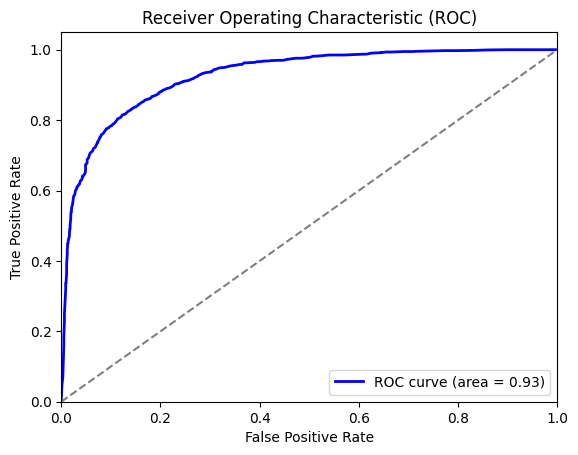

In [57]:
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Important Features

In [58]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[-10:]
top_features = [X.columns[i] for i in indices]
top_importances = importances[indices]
fig = go.Figure([go.Bar(x=top_importances, y=top_features, orientation='h')])
fig.update_layout(
    title='Top 10 Important Features - Random Forest',
    xaxis_title='Feature Importance',
    yaxis_title='Feature',
    height=500
)
fig.show()

# **K-Means**

# Elbow method

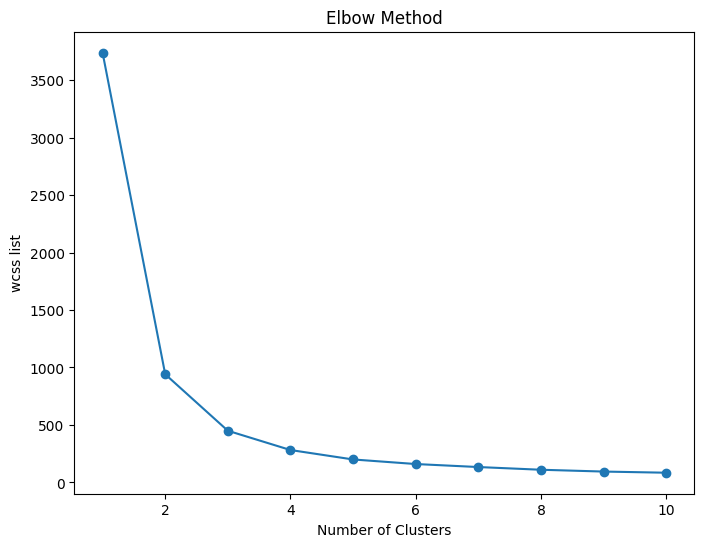

In [59]:
elbow = teledata[teledata['Churn'] == 'Yes'][["tenure", "TotalCharges"]]
scaler = StandardScaler()
elbow_scaled = scaler.fit_transform(elbow)
StandardScaler(copy=True,with_mean=True,with_std=True)
elbow_scaled = pd.DataFrame(elbow_scaled, columns=["tenure", "TotalCharges"])

wcss = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(elbow_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss list')
plt.show()

In [60]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(elbow)
labels = kmeans.predict(elbow)
elbow['Cluster'] = kmeans.labels_

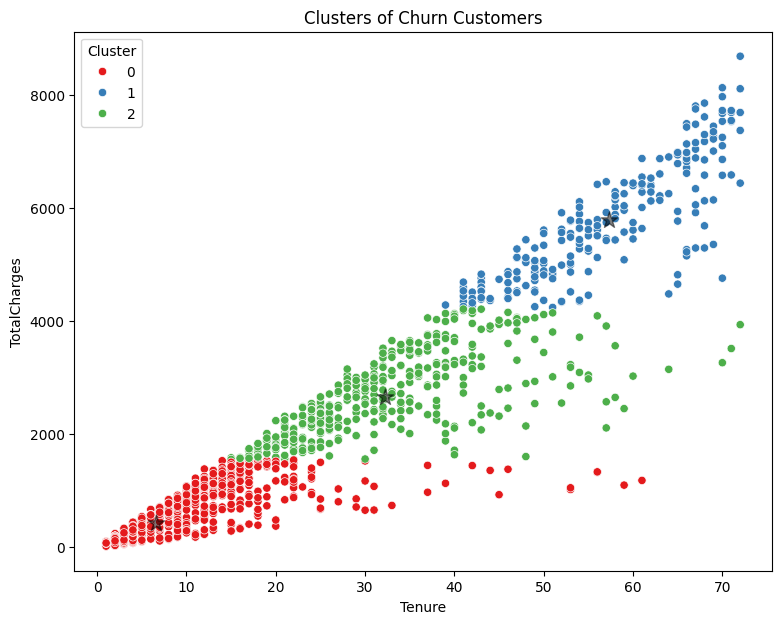

In [61]:
plt.figure(figsize=(9, 7))
sns.scatterplot(x='tenure', y='TotalCharges', data=elbow, hue='Cluster', palette='Set1')
plt.xlabel("Tenure")
plt.ylabel("TotalCharges")
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color="black", marker="*", s=150 , alpha = 0.5)
plt.title("Clusters of Churn Customers")
plt.show()

# Cross Tabulation

Cross-tabulation of Clusters vs Churn:
Churn     Yes
Cluster      
0.0      1255
1.0       220
2.0       394


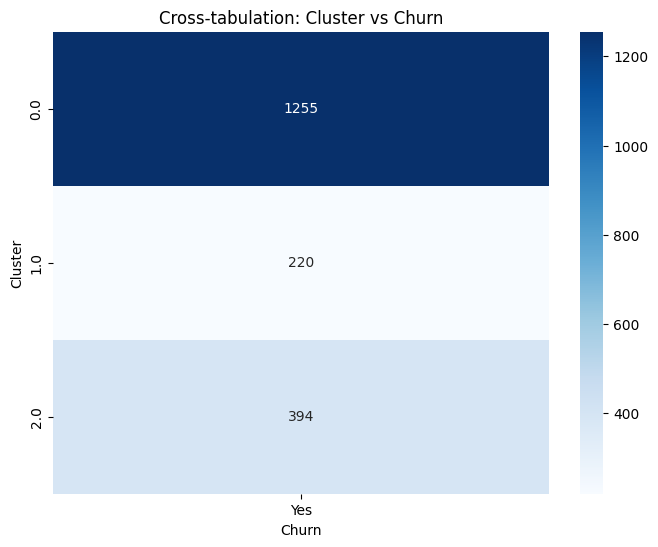

In [62]:
teledata['Cluster'] = elbow['Cluster']
crosstab = pd.crosstab(teledata['Cluster'], teledata['Churn'])
print("Cross-tabulation of Clusters vs Churn:")
print(crosstab)

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title("Cross-tabulation: Cluster vs Churn")
plt.ylabel("Cluster")
plt.xlabel("Churn")
plt.show()

# Silhouette Score

In [63]:
silhouette = silhouette_score(elbow_scaled, elbow['Cluster'])
print(f"Silhouette Score for {k} clusters: {silhouette}")

Silhouette Score for 3 clusters: 0.6364276935211584


# **Hierarchical Clustering**

In [64]:
linked = linkage(elbow_scaled, method='ward')


*  Using the combined labels based on tenure and TotalCharges
*  Truncation the dendrogram
*  Showing only the last 35 merged clusters


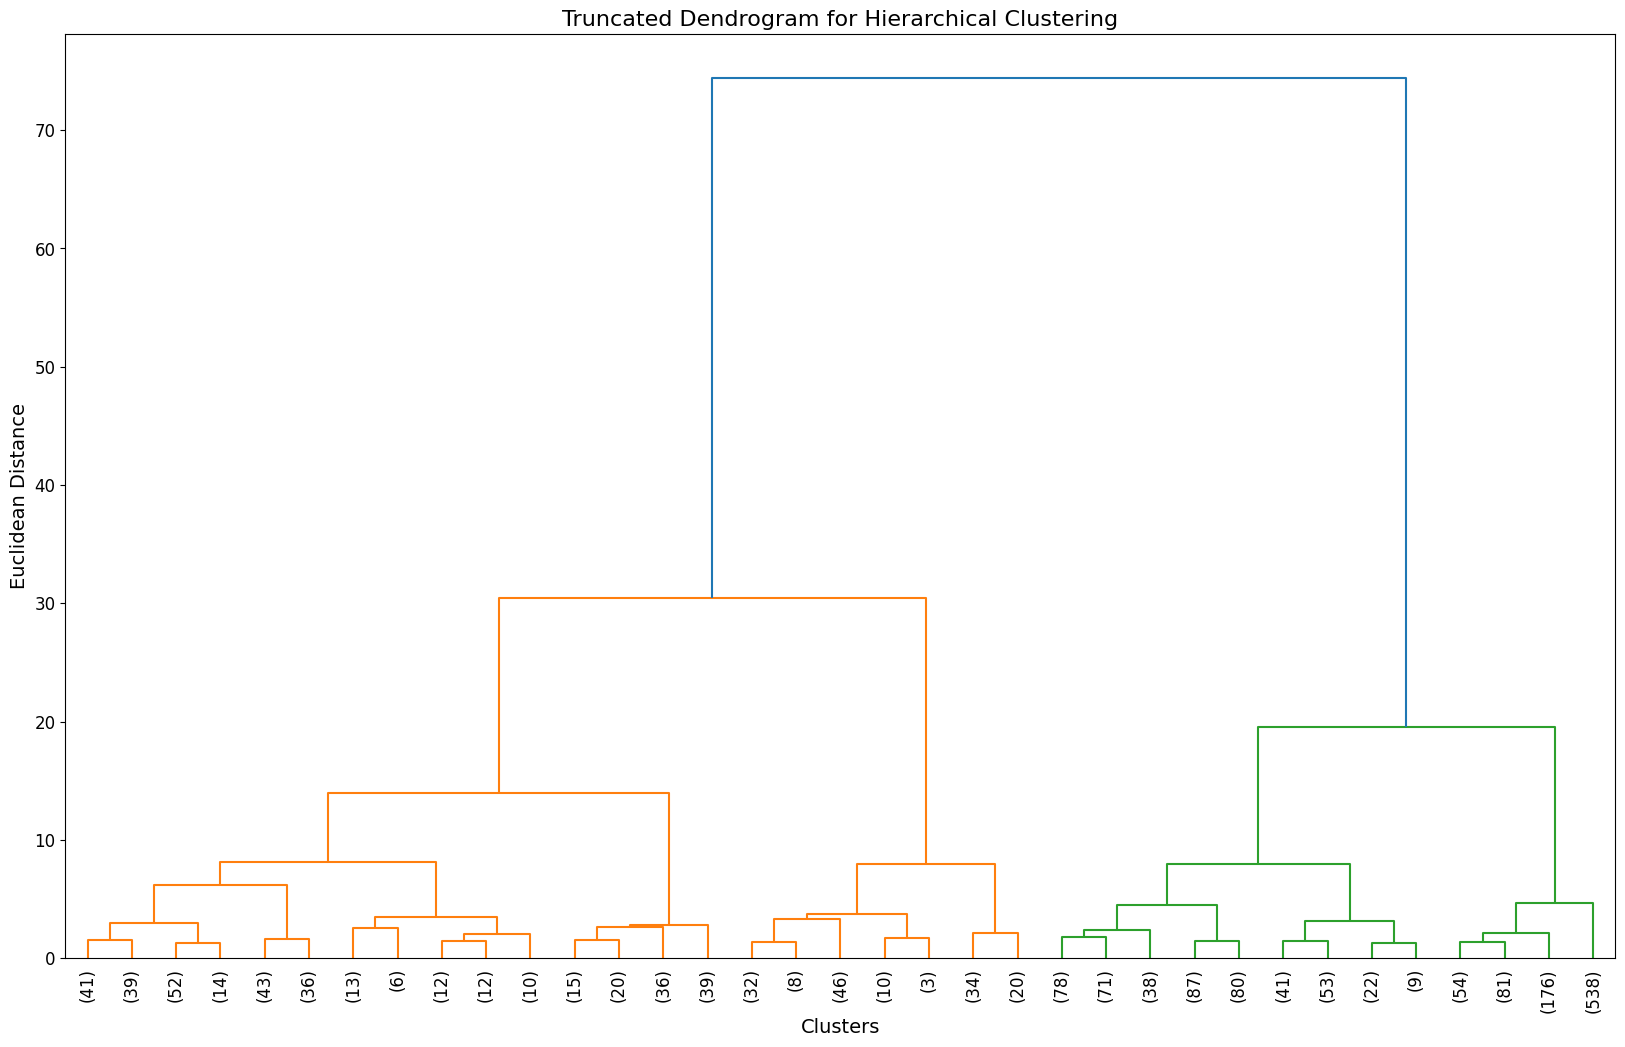

In [65]:
labels2 = elbow.apply(lambda row: f"Tenure:{row['tenure']} | Charges:{row['TotalCharges']}", axis=1).tolist()
plt.figure(figsize=(20, 12))
dendrogram(linked,
           orientation='top',
           labels=labels2,
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',
           p=35)

plt.title("Truncated Dendrogram for Hierarchical Clustering", fontsize=16)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Euclidean Distance', fontsize=14)
plt.xticks(fontsize=12, rotation=90)  # Rotate x-axis labels vertically for better readability
plt.yticks(fontsize=12)

plt.show()


# Cross-Tabulation by Tenure Buckets and Clusters

Note :

tenure buckets to group customers into meaningful ranges for example ( low, medium, high tenure)

In [66]:
elbow['Tenure_Bucket'] = pd.cut(elbow['tenure'], bins=[0, 12, 36, 72, 120], labels=['0-12 months', '1-3 years', '3-6 years', '6+ years'])
cross_tab_tenure = pd.crosstab(elbow['Tenure_Bucket'], elbow['Cluster'])
print("Cross-Tabulation between Tenure Buckets and Clusters:")
print(cross_tab_tenure)


Cross-Tabulation between Tenure Buckets and Clusters:
Cluster           0    1    2
Tenure_Bucket                
0-12 months    1037    0    0
1-3 years       205    0  269
3-6 years        13  220  125


# Cross-Tabulation by TotalCharges Buckets and Clusters

Note :

TotalCharges buckets to group customers based on how much they have been charged

In [67]:
elbow['Charges_Bucket'] = pd.cut(elbow['TotalCharges'], bins=[0, 1000, 3000, 5000, 7000], labels=['Low', 'Medium', 'High', 'Very High'])
cross_tab_charges = pd.crosstab(elbow['Charges_Bucket'], elbow['Cluster'])
print("Cross-Tabulation between TotalCharges Buckets and Clusters:")
print(cross_tab_charges)

Cross-Tabulation between TotalCharges Buckets and Clusters:
Cluster            0    1    2
Charges_Bucket                
Low             1070    0    0
Medium           185    0  264
High               0   63  130
Very High          0  124    0


# **DBSCAN**

# KNN to know the optimal eps and min_samples

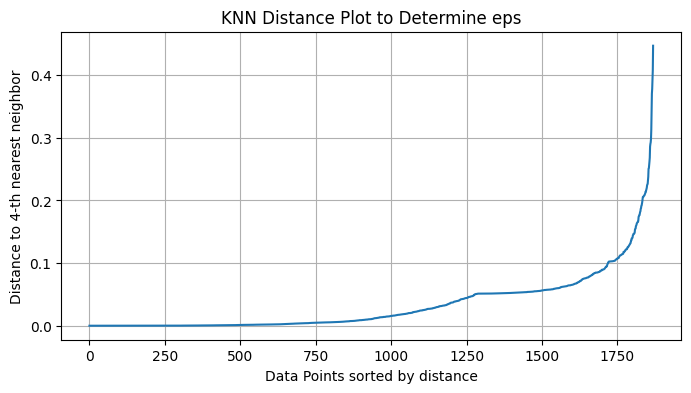

In [68]:
min_samples = 4
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(elbow_scaled)
distances, indices = neighbors_fit.kneighbors(elbow_scaled)
distances = np.sort(distances[:, min_samples-1], axis=0)
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('KNN Distance Plot to Determine eps')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Distance to {}-th nearest neighbor'.format(min_samples))
plt.grid(True)
plt.show()

# From this plot , We can conclude that the optimal eps=0.18 and the optimal min_samples=4

In [69]:
dbscan_optimal = DBSCAN(eps=0.18, min_samples=4)
clusters_optimal = dbscan_optimal.fit_predict(elbow_scaled)
elbow['DBSCAN_Cluster_Optimal'] = clusters_optimal
print(elbow['DBSCAN_Cluster_Optimal'].value_counts())

DBSCAN_Cluster_Optimal
 0    1824
-1      27
 2      12
 1       6
Name: count, dtype: int64


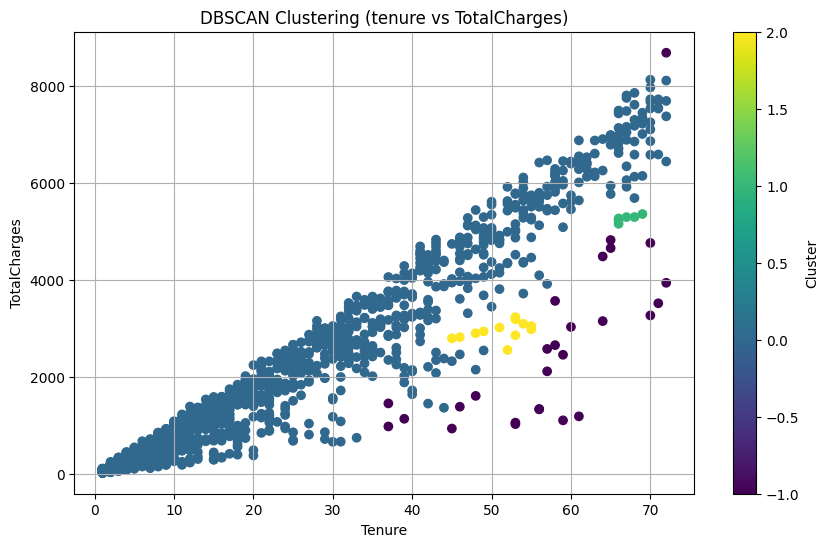

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(elbow['tenure'], elbow['TotalCharges'], c=elbow['DBSCAN_Cluster_Optimal'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering (tenure vs TotalCharges)')
plt.xlabel('Tenure')
plt.ylabel('TotalCharges')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
